In [1]:
# importing necessary packages and modules

import numpy  as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.ensemble import IsolationForest
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import scale
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import HuberRegressor
from sklearn.linear_model import RANSACRegressor
from sklearn.linear_model import TheilSenRegressor 

In [2]:
# importing data

df_raw = pd.read_excel('https://archive.ics.uci.edu/ml/machine-learning-databases/concrete/compressive/Concrete_Data.xls',header=0)
df_raw.head()

,Cement (component 1)(kg in a m^3 mixture),Blast Furnace Slag (component 2)(kg in a m^3 mixture),Fly Ash (component 3)(kg in a m^3 mixture),Water (component 4)(kg in a m^3 mixture),Superplasticizer (component 5)(kg in a m^3 mixture),Coarse Aggregate (component 6)(kg in a m^3 mixture),Fine Aggregate (component 7)(kg in a m^3 mixture),Age (day),"Concrete compressive strength(MPa, megapascals)"
0,540.0,0.0,0.0,162.0,2.5,1040.0,676.0,28,79.986111
1,540.0,0.0,0.0,162.0,2.5,1055.0,676.0,28,61.887366
2,332.5,142.5,0.0,228.0,0.0,932.0,594.0,270,40.269535
3,332.5,142.5,0.0,228.0,0.0,932.0,594.0,365,41.052780
4,198.6,132.4,0.0,192.0,0.0,978.4,825.5,360,44.296075


In [3]:
# simplifying the header
df_raw.columns = ['Cement', 'BFS', 'FlyAsh', 'Water', 'SP', 'CoarseAgg', 'FineAgg', 'Age', 'Strength']
df_raw

,Cement,BFS,FlyAsh,Water,SP,CoarseAgg,FineAgg,Age,Strength
0,540.0,0.0,0.0,162.0,2.5,1040.0,676.0,28,79.986111
1,540.0,0.0,0.0,162.0,2.5,1055.0,676.0,28,61.887366
2,332.5,142.5,0.0,228.0,0.0,932.0,594.0,270,40.269535
3,332.5,142.5,0.0,228.0,0.0,932.0,594.0,365,41.052780
4,198.6,132.4,0.0,192.0,0.0,978.4,825.5,360,44.296075
...,...,...,...,...,...,...,...,...,...
1025,276.4,116.0,90.3,179.6,8.9,870.1,768.3,28,44.284354
1026,322.2,0.0,115.6,196.0,10.4,817.9,813.4,28,31.178794
1027,148.5,139.4,108.6,192.7,6.1,892.4,780.0,28,23.696601
1028,159.1,186.7,0.0,175.6,11.3,989.6,788.9,28,32.768036


In [4]:
# Checking for Missing Values:
df_raw.shape 

(1030, 9)

In [5]:
df_raw.count()  

Cement       1030
BFS          1030
FlyAsh       1030
Water        1030
SP           1030
CoarseAgg    1030
FineAgg      1030
Age          1030
Strength     1030
dtype: int64

In [6]:
# No Missing Values, checked

In [7]:
# Checking for data type error
df_raw.dtypes

Cement       float64
BFS          float64
FlyAsh       float64
Water        float64
SP           float64
CoarseAgg    float64
FineAgg      float64
Age            int64
Strength     float64
dtype: object

In [8]:
# No object element observed, checked

In [9]:
'''
Finding and removing extreme outliers using z-values:

Method explanation:
all data are normalized, those falling more than 3 standard deviations away from the mean will be deleted

'''

'\nFinding and removing extreme outliers using z-values:\n\nMethod explanation:\nall data are normalized, those falling more than 3 standard deviations away from the mean will be deleted\n\n'

In [10]:
# columns_to_check_for_outliers
cols_with_outliers = df_raw.columns

In [11]:
# define a function called outliers
# which returns a list of index of outliers
# z = (x-M) / SD
# +/- 3    

def outliers(df,ft):
    x  = df[ft]
    M  = x.mean()
    SD = x.std()
    z  = (x-M) / SD
    
    upper_bound = +3
    lower_bound = -3
    
    ls = df.index[  (z > upper_bound) 
                  | (z < lower_bound) ]
    
    return ls

In [12]:
# create a function to store the output indices 
# from multiple columns    

index_list = []
for feature in cols_with_outliers:  
    index_list.extend( outliers(df_raw,feature) )
    
index_list

[553,
 559,
 571,
 584,
 873,
 936,
 76,
 79,
 99,
 102,
 122,
 125,
 145,
 148,
 168,
 171,
 2,
 3,
 4,
 6,
 12,
 17,
 24,
 25,
 26,
 30,
 31,
 33,
 34,
 35,
 41,
 42,
 56,
 60,
 61,
 63,
 65,
 66,
 604,
 610,
 616,
 620,
 622,
 756,
 769,
 792,
 798,
 814,
 820]

In [13]:
# Calculating Percent of dirty data
dirty_Percent = len(index_list)/len(df_raw)*100
dirty_Percent

4.757281553398058

In [14]:
# around 5% of data are extreme outliers
# and will be deleted

# define a function called "remove"
# which returns a cleaned dataframe
# without outliers

def remove(df, ls):
    ls = sorted(set(ls))
    df = df.drop(ls)
    return df 
  
df_clean = remove( df_raw, index_list )
len(df_clean) / len(df_raw)

0.9524271844660194

In [15]:
# we assume 10% noise in the data
# 5% was detected ansd deleted by statistic method (z-value)
# 5% will be deleted by machine learning method (Isolation-Forest)

In [16]:
# Making the Isolation-Forest 
# to clean 5% noise

data = df_clean.values
cols = df_clean.columns 

IF = IsolationForest(contamination=0.05)
IF.fit( data )

flag_clean = IF.predict( data ) == +1  
data_clean = data[ flag_clean, : ]   
df_cleaned   = pd.DataFrame( data_clean, columns=cols )  

len(df_cleaned) / len(df_raw)

0.9048543689320389

In [17]:
len(df_cleaned)

932

In [18]:
# # # # # # # # # # # # # # # # # # # # # # # # # # # # # #
#                                                         #
#                   Formatting the data                   #  
#                                                         #
# # # # # # # # # # # # # # # # # # # # # # # # # # # # # #

In [19]:
# step 0: Defining x & y
x = df_cleaned.drop( 'Strength', axis=1 ).copy()
y = df_cleaned['Strength'].copy()

In [20]:
# step 1: Downsampling
len(y)

932

In [21]:
# As the data size is not huge, downsampling is not required

In [22]:
# step 2: One-Hot encoding
x.dtypes

Cement       float64
BFS          float64
FlyAsh       float64
Water        float64
SP           float64
CoarseAgg    float64
FineAgg      float64
Age          float64
dtype: object

In [23]:
# As none of data are categorical, this step is neither performable nor required
x_encoded = x

In [24]:
# step 3: training and testing sets 
x_train, x_test, y_train, y_test = train_test_split(
    x_encoded, y, random_state=420, test_size=0.05 
    ) 

In [25]:
# step 4: scaling 
x_train_scaled = scale( x_train )
x_test_scaled  = scale( x_test  )

In [26]:
# # # # # # # # # # # # # # # # # # # # # # # # # # # # # #
#                                                         #
#                   defining Regressors                   #
#                                                         #
# # # # # # # # # # # # # # # # # # # # # # # # # # # # # #

In [27]:
# Linear Regressor
Linear_reg   = LinearRegression() 

# Non_Linear Regressors
Hubert_reg   = HuberRegressor()
RANSACR_reg  = RANSACRegressor() 
TheilSen_reg = TheilSenRegressor()

In [28]:
# # # # # # # # # # # # # # # # # # # # # # # # # # # # # #
#                                                         #
#           fitting, finding rmse & Visualizing           #
#                                                         #
# # # # # # # # # # # # # # # # # # # # # # # # # # # # # #

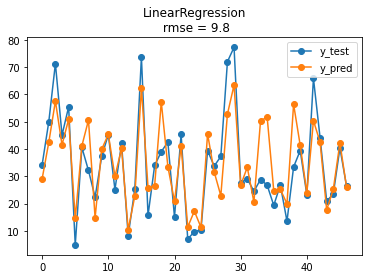

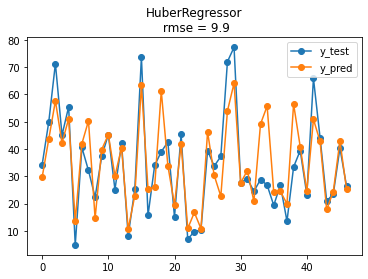

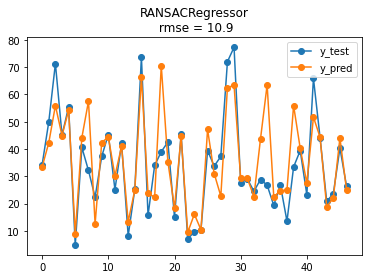

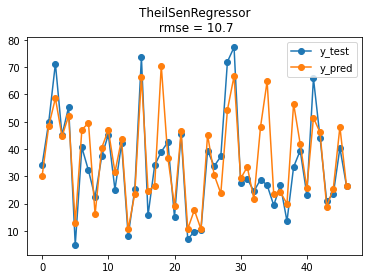


RMSE ...


,regressor,rmse
0,LinearRegression,9.75
1,HuberRegressor,9.91
2,RANSACRegressor,10.87
3,TheilSenRegressor,10.73


In [29]:
n=[]
a=[]

for reg in (  Linear_reg
            , Hubert_reg
            , RANSACR_reg
            , TheilSen_reg
            ):
    
    # fitting 
    reg.fit( x_train_scaled, y_train )
    
    # Finding RMSE
    y_pred = reg.predict( x_test_scaled ) 
    dSq = ( y_test - y_pred )**2
    rmse = ( sum(dSq)/len(dSq) )**0.5 
    n.append( reg.__class__.__name__ )
    a.append( rmse )  
    
    # Visualizing  by  Plotting y_test vs y_pred 
    x_ax = range( len(y_test) )
    fig, ax = plt.subplots()     #figsize=(8,8)
    ax.plot( x_ax , y_test, ls='-', marker='o' ) 
    ax.plot( x_ax , y_pred, ls='-', marker='o' ) 
    ax.set_title( reg.__class__.__name__  + '\n rmse = ' +  np.str( np.round(rmse,1) ))
    ax.legend(['y_test','y_pred'])  
    #plt.savefig(( np.str( np.round(rmse,3)) + '.png'), dpi=120) 
    plt.show()
    
# RMSE
print('\nRMSE ...')
RMSE=df_cleaned.iloc[:,[0,0]].head(4)
RMSE.iloc[:,0] = n
RMSE.iloc[:,1] = np.round(a,2)
RMSE.columns = ['regressor', 'rmse']
RMSE

In [30]:
# as we have cleaned the data, linear regression has minimum rmse (as expected)
# thus is the best regressor

In [31]:
# # # # # # # # # # # # # # # # # # # # # # # # # # # # # #
#                                                         #
#               Preparing to make predictions             #
#                                                         #
# # # # # # # # # # # # # # # # # # # # # # # # # # # # # #

In [32]:
# Finding Acceptible range for each item
Range = pd.concat([x[x.columns].min(),x[x.columns].max()],axis=1)
Range.columns = ['Min','Max']

print('\n Acceptable Range ...')
Range


 Acceptable Range ...


,Min,Max
Cement,102.00,540.0
BFS,0.00,316.1
FlyAsh,0.00,200.1
Water,121.75,237.0
SP,0.00,22.1
CoarseAgg,801.00,1145.0
FineAgg,594.00,945.0
Age,1.00,180.0


In [42]:
# input data for concrete to predict its strength

# item                Range
Cement = 350      # 102 to  540
BFS    =   0      #   0 to  316 
FlyAsh =   0      #   0 to  200
Water  = 186      # 122 to  237
SP     =   0      #   0 to   22
CoarseAgg = 1050   # 801 to 1145
FineAgg   = 770   # 594 to  945
Age    =  28      #   1 to  180

# Predicted_Strength
s = [ Cement, BFS, FlyAsh, Water, SP, CoarseAgg, FineAgg, Age ]
s = pd.DataFrame( np.array([s.copy(),s.copy()]) , columns=x_test.columns )
sx = pd.concat( [s,x_train], axis=0 )
sx_scaled = scale( sx )
predicted_strength = Linear_reg.predict( sx_scaled )[0]
print('Predicted Compressive Strength = ',np.round( predicted_strength, 1 ),' (MPa)')
 

Predicted Compressive Strength =  27.9  (MPa)
